# cnn

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Python version:", sys.version)
print('tensorflow', tf.__version__)
print('numpy', np.__version__)

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.5.3
numpy 1.19.5


In [ ]:
maxpool2d #batch, height, width, channels

## filter

(1, 3, 3, 1)


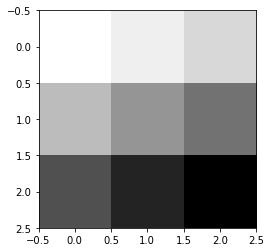

In [4]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.shape (1, 3, 3, 1)
weight shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


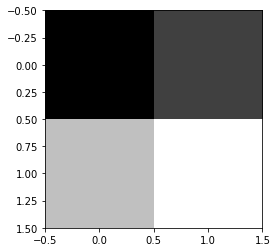

In [7]:
print("image.shape", image.shape)
weight = np.array( [[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]] )
print('weight shape', weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID',
                                kernel_initializer = weight_init)(image) #합치기
print('conv2d.shape', conv2d.shape)
print(conv2d.numpy().reshape(2,2))

plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


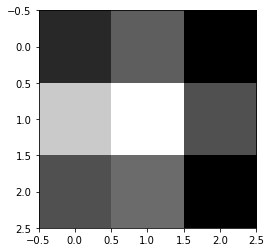

In [9]:
print("image.shape", image.shape)
weight = np.array( [[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]] )
print('weight shape', weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME',
                                kernel_initializer = weight_init)(image) #칸 수 그대로 합치기
print('conv2d.shape', conv2d.shape)
print(conv2d.numpy().reshape(3,3))

plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape (1, 3, 3, 1)
weight shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


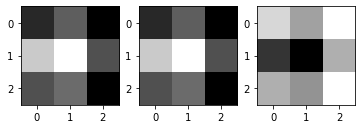

In [11]:
print("image.shape", image.shape)
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print('weight shape', weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                                kernel_initializer = weight_init)(image) #칸 수 그대로 합치기
print('conv2d.shape', conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## max pool

In [14]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape, pool.numpy())

(1, 1, 1, 1) [[[[4.]]]]


In [20]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape, pool.numpy())

(1, 2, 2, 1) [[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## mnist

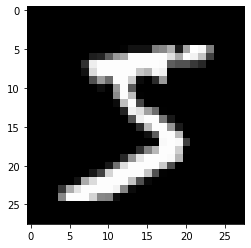

In [26]:
mnist = tf.keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 10)


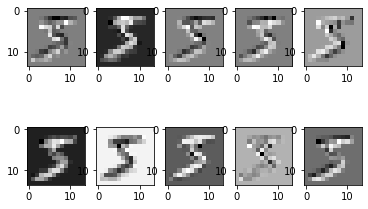

In [30]:
img = train_images[0]
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
conv2d = tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=(2,2), padding='SAME',
                               kernel_initializer=weight_init)(img)
print(conv2d.shape)

feature_maps = np.swapaxes(conv2d,0,3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(2,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 10)


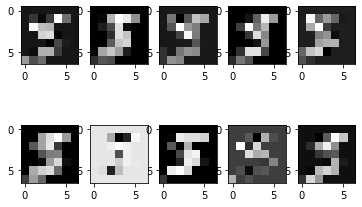

In [31]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool,0,3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(2,5,i+1), plt.imshow(feature_map.reshape(7,7),cmap='gray')
plt.show()

## mnist sequential

In [56]:
import os 
from tensorflow.keras.utils import to_categorical

learning_rate = 0.01
training_epochs = 15
batch_size = 100

tf.random.set_seed(7777)

In [82]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'minst_ensemble' #변경사항

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

In [58]:
mnist = tf.keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                #'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).\
                shuffle(buffer_size = 100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).\
                batch(batch_size) #test data에 shuffle은 필요 x

In [59]:
# model function (sequential)
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, 
                                     padding='SAME', input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME')) #pool_size=(2,2), strides=(2,2) 기본 설정으로 생략됨
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, 
                                     padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, 
                                     padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.4)) #dense layer가 많아서 dropout을 이용함.
    model.add(tf.keras.layers.Dense(10))
    return model

model = create_model()
model.summary()

In [60]:
# model function (functional)

'''
sequantial은 단계적으로 하기에는 좋지만 
multi-input/output model을 만들거나
layer를 share하는 경우나 residual connections 같은 non-sequential한 모델을 만들기에는 힘듦
(ex - inception, residual block)
'''

def create_model2():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size = [3,3], padding='SAME', activation=tf.nn.relu)(inputs)
    pool1 = tf.keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size = [3,3], padding='SAME', activation=tf.nn.relu)(pool1)
    pool2 = tf.keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size = [3,3], padding='SAME', activation=tf.nn.relu)(pool2)
    pool3 = tf.keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = tf.keras.layers.Flatten()(pool3)
    dense4 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)(pool3_flat)
    drop4 = tf.keras.layers.Dropout(rate=0.4)(dense4)
    logits = tf.keras.layers.Dense(units=10)(drop4)
    return tf.keras.Model(inputs=inputs, outputs=logits)

model = create_model2()
model.summary()

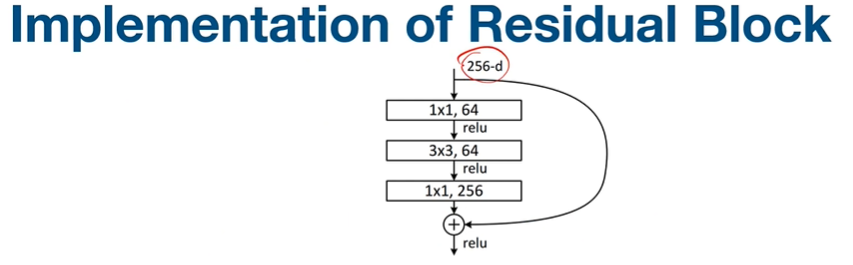

In [127]:
#  cf) residual block

inputs = tf.keras.Input(shape=(28, 28, 256))
conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size = 1, padding='SAME', activation=tf.nn.relu)(inputs)
conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size = 3, padding='SAME', activation=tf.nn.relu)(conv1)
conv3 = tf.keras.layers.Conv2D(filters=256, kernel_size = 1, padding='SAME')(conv2) #뒤에서 relu 적용할 것이라 생략함
add3 = tf.keras.layers.add([conv3, inputs]) #층끼리 덧셈\
relu3 = tf.nn.relu(add3)
res_model = tf.keras.Model(inputs=inputs, outputs=relu3)
res_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 28, 28, 256) 0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 28, 28, 64)   16448       input_20[0][0]                   
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 28, 28, 64)   36928       conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 28, 28, 256)  16640       conv2d_116[0][0]                 
____________________________________________________________________________________________

In [68]:
# subclassing method

'''
fully customized model  만들 수 있음
'''

class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__() #상위 init method call
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = tf.keras.layers.MaxPool2D(padding='SAME') 
        self.pool3_flat = tf.keras.layers.Flatten()
        self.dense4 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = tf.keras.layers.Dropout(rate=0.4)
        self.dense5 = tf.keras.layers.Dense(units=10)
        
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

model = MNISTModel()
temp_inputs = tf.keras.Input(shape=(28,28,1))
model(temp_inputs)
model.summary()

Model: "mnist_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_23 (Conv2D)           multiple                  18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_24 (Conv2D)           multiple                  73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_7 (Flatten)          multiple                

In [75]:
@tf.function
def loss_fn(model, images, labels):
    logits = model(images, training=True) #dropout 적용
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred = logits,
                                                                  y_true = labels, from_logits = True))
    return loss

@tf.function
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

@tf.function
def evaluate(model, images, labels):
    logits = model(images, training=False) #평가는 dropout x
    correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

checkpoint = tf.train.Checkpoint(cnn=model)

@tf.function
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [70]:
print('learing started. it takes sometime.')

for epoch in range(training_epochs):
    avg_loss = 0
    avg_train_acc = 0
    avg_test_acc = 0
    train_step = 0
    test_step = 0 
    
    for images, labels in train_dataset:
        train(model, images, labels)
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss += loss
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:
        acc = evaluate(model, images, labels)
        avg_test_acc += acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step  
    
    print(' epoch :' , '{}'.format(epoch + 1), 'loss = ', '{:.8f}'.format(avg_loss),
         'train accuracy = ', '{:.4f}'.format(avg_train_acc),
         'test accuracy = ', '{:.4f}'.format(avg_test_acc),
         )
    
    checkpoint.save(file_prefix = checkpoint_prefix)
    
print('learing finished.' )

learing started. it takes sometime.
 epoch : 1 loss =  0.22903837 train accuracy =  0.9362 test accuracy =  0.9744
 epoch : 2 loss =  0.07070373 train accuracy =  0.9822 test accuracy =  0.9810
 epoch : 3 loss =  0.06408929 train accuracy =  0.9842 test accuracy =  0.9818
 epoch : 4 loss =  0.06087476 train accuracy =  0.9850 test accuracy =  0.9780
 epoch : 5 loss =  0.05939992 train accuracy =  0.9852 test accuracy =  0.9807
 epoch : 6 loss =  0.06009902 train accuracy =  0.9853 test accuracy =  0.9790
 epoch : 7 loss =  0.06166732 train accuracy =  0.9850 test accuracy =  0.9806


KeyboardInterrupt: 

## using ensemble

In [107]:
# using ensemble

class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = tf.keras.layers.MaxPool2D(padding='SAME') 
        self.pool3_flat = tf.keras.layers.Flatten()
        self.dense4 = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = tf.keras.layers.Dropout(rate=0.4)
        self.dense5 = tf.keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

models = []
temp_inputs = tf.keras.Input(shape=(28, 28, 1))
num_models = 3
for mm in range(num_models):
    model = MNISTModel()
    model(temp_inputs)
    models.append(model)
    
# models = []
# num_models = 3
# for m in range(num_models):
#     models.append(MNISTModel())

In [108]:
def evaluate_enseble(models, images, labels):
    predictions = np.zeros_like(labels)
    for model in models:
        logits = model(images, training=False)
        predictions += logits
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

checkpoints = []
for mm in range(num_models):
    checkpoints.append(tf.train.Checkpoint(cnn=models[mm]))

In [110]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        for model in models:
            #train(model, images, labels)
            grads = grad(model, images, labels)                
            optimizer.apply_gradients(zip(grads, model.variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate_enseble(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate_enseble(models, images, labels)        
        avg_test_acc += acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    
    for idx, checkpoint in enumerate(checkpoints):
        checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.08248740 train accuracy =  0.9865 test accuracy =  0.9872
Epoch: 2 loss = 0.05761498 train accuracy =  0.9923 test accuracy =  0.9912
Epoch: 3 loss = 0.05200698 train accuracy =  0.9937 test accuracy =  0.9899
Epoch: 4 loss = 0.04870121 train accuracy =  0.9940 test accuracy =  0.9909
Epoch: 5 loss = 0.04648633 train accuracy =  0.9951 test accuracy =  0.9918
Epoch: 6 loss = 0.04516096 train accuracy =  0.9954 test accuracy =  0.9923
Epoch: 7 loss = 0.04547832 train accuracy =  0.9953 test accuracy =  0.9922
Epoch: 8 loss = 0.04595081 train accuracy =  0.9959 test accuracy =  0.9912
Epoch: 9 loss = 0.04455734 train accuracy =  0.9962 test accuracy =  0.9914


KeyboardInterrupt: 

## cnn best

In [128]:
def data_aumentation(images, labels):
    aug_images = []
    aug_labels = []
    
    for xx, yy in zip(images, labels):
        aug_images.append(xx)
        aug_labels.append(yy)
        
        bg_value = np.median(xx) #rotate나 shift를 하고 나면 이미지의 빈 공간이 생기는데 background 채우는 용도
        
        for _ in range(4): #4배 불리기 (총 5배)
            angle = np.random.randint(-15, 15, 1) 
            rot_img = ndimage.rotate(x, angle[0], reshape=False, cval=bg_value)
            
            shift = np.random.randint(-2, 2, 2) #2픽셀, 숫자 2개(가로, 세로 방향)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)
            
            aug_images.append(shift_img)
            aug_lables.append(yy)
        
    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    return aug_images, aug_labels

In [ ]:
mnist = tf.keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                #'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, train_labels = data_augmentation(train_images, train_labels)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).\
                shuffle(buffer_size = 500000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).\
                batch(batch_size) #test data에 shuffle은 필요 x

In [111]:
class ConvBNRelu(tf.keras.Model):
    def __init__(self, filters, kernel_size=3, strides=1, padding='SAME'):
        super(ConvBNRelu, self).__init__()
        self.conv = tf.keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides,
                                          padding=padding, kernel_initializer = 'glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.conv(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer
    
class DenseBNRelu(tf.keras.Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = tf.keras.layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.dense(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer        
        

In [113]:
# using ensemble

class MNISTModel_final(tf.keras.Model):
    def __init__(self):
        super(MNISTModel_final, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size=[3,3], padding='SAME')
        self.pool1 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = ConvBNRelu(filters=64, kernel_size=[3,3], padding='SAME')
        self.pool2 = tf.keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = ConvBNRelu(filters=128, kernel_size=[3,3], padding='SAME')
        self.pool3 = tf.keras.layers.MaxPool2D(padding='SAME') 
        self.pool3_flat = tf.keras.layers.Flatten()
        self.dense4 = DenseBNRelu(units=256)
        self.drop4 = tf.keras.layers.Dropout(rate=0.4)
        self.dense5 = tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal')
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

models = []
temp_inputs = tf.keras.Input(shape=(28, 28, 1))
num_models = 2
for mm in range(num_models):
    model = MNISTModel_final()
    model(temp_inputs)
    models.append(model)

In [114]:
#모델의 갯수만큼 곱해야지 5 epoch라는 조건에 도달하면 lr을 * 0.5배 로 줄일 수 있음
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*num_models*5,
                                                         0.5, 
                                                          staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decay)

checkpoints = []
for nn in range(num_models):
    checkpoints.append(tf.train.Checkpoint(cnn=models[nn]))

In [121]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [122]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        for model in models:
            #train(model, images, labels)
            grads = grad(model, images, labels)                
            optimizer.apply_gradients(zip(grads, model.variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate_enseble(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate_enseble(models, images, labels)        
        avg_test_acc += acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    
    for idx, checkpoint in enumerate(checkpoints):
        checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.05234759 train accuracy =  0.8500 test accuracy =  0.9622
Epoch: 2 loss = 0.02878852 train accuracy =  0.9913 test accuracy =  0.9914
Epoch: 3 loss = 0.02135110 train accuracy =  0.9939 test accuracy =  0.9933
Epoch: 4 loss = 0.01773952 train accuracy =  0.9954 test accuracy =  0.9909
Epoch: 5 loss = 0.01537665 train accuracy =  0.9959 test accuracy =  0.9948
Epoch: 6 loss = 0.01069614 train accuracy =  0.9985 test accuracy =  0.9953
Epoch: 7 loss = 0.00665665 train accuracy =  0.9991 test accuracy =  0.9942
Epoch: 8 loss = 0.00582926 train accuracy =  0.9991 test accuracy =  0.9938


KeyboardInterrupt: 